<a href="https://colab.research.google.com/github/ucfilho/Raianars_Thesis/blob/main/RTC/Hybrid_Frannk_RTC_mar_01_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 7.82 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight


In [47]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 12.59 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One


In [48]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 

Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100

fator = 1.0/3.0; 



In [49]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 7.45 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [50]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 15.23 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One


In [51]:
RUNS=50
mut=0.25
crossp=0.25
Fi=mut;CRi=crossp;# para impressão


In [52]:
def buildMatriz(x):
  global Trocas, tempInicial, tempAtual 
  NPAR=1
  cols=len(tempInicial)
  size=3*cols
  x=np.array(x).reshape(1,size)
  # print('x=');print(x)
  Ind_I=np.zeros((NPAR,Trocas)).astype(np.int64)
  Ind_J=np.zeros((NPAR,Trocas)).astype(np.int64)
  Tin=np.zeros((NPAR,Trocas))
  Tout=np.zeros((NPAR,Trocas))
  deltaT=np.zeros((NPAR,Trocas))
  for i in range(NPAR):
    for j in range(Trocas):
      #print('[i,j]=%d %d'%(i,j))
      Ind_I[i,j]=round(x[i,j])
      Ind_J[i,j]=round(x[i,j+Trocas])
      deltaT[i,j]=x[i,j+2*Trocas] 
    for jj in range(cols):
      Tin[i,jj]=tempInicial[jj]
      Tout[i,jj]=tempAtual[jj]
  return Ind_I,Ind_J,deltaT, Tin, Tout

In [53]:
def Temperatura(x):
  global Trocas, mCp,tempInicial
  
  NPAR=1
  Ind_I,Ind_J,deltaT,Tin, Tout=buildMatriz(x) 
  Tatual=np.copy(np.array(tempInicial))

  erro=np.zeros((NPAR)) # valor erro se torna erro=1 quando ha algum erro e vai penalizar
  for ki in range(NPAR):
    for kj in range(Trocas):
      #Tin=np.copy(Tout)
      k=kj
      i=Ind_I[ki,kj]
      j=Ind_J[ki,kj]
      
      tempSaidaQ=Tout[ki,i]+deltaT[ki,kj]
      tempSaidaF=-mCp[kj]*deltaT[ki,kj]/(mCp[j])+Tout[ki,j]
      flag=0 # flag : indica que nao entra no teste logico
      # usei flag no lugar q ifs pq a identacao ficou melhor assim
      if(Tout[ki,i] > Tout[ki,j]): #Tquente maior Tfria: vaores atuais
        if(tempSaidaQ > tempSaidaF): #Tquente maior Tfria: saidas
          flag=1
      if(flag>0):
        Tout[ki,i]=tempSaidaQ
        Tout[ki,j]=tempSaidaF
      else:
        erro[ki]=1

  return Tout,erro

In [54]:
def Area(x):

  global mCp,tempAlvo,tempInicial,Trocas,U
  
  NPAR=1
  
  Area=[]

  Ind_I,Ind_J,deltaT,Tin, Tout=buildMatriz(x) 
  Tatual=np.copy(np.array(tempInicial))

  rows=Trocas 
  cols=len(mCp)

  Area_Particula=[]

  for k in range(Trocas):

    i=Ind_I[0,k]
    j=Ind_J[0,k]
    tempSaidaQ=Tatual[i]+deltaT[0,k]
    tempSaidaF=-deltaT[0,k]*mCp[i]/(mCp[j])+Tatual[j]

    Told_i=np.copy(Tatual[i])
    Told_j=np.copy(Tatual[j])

    Tatual[i]=np.copy(tempSaidaQ)
    Tatual[j]=np.copy(tempSaidaF)
    deltaT1=Told_i-tempSaidaF
    deltaT2=tempSaidaQ-Told_j
    try:
      A=(deltaT1-deltaT2)
      B=np.log((deltaT1/deltaT2))
      deltaTMediaLog=A/B
    except:
      deltaTMediaLog=1e99
  
    if(deltaTMediaLog==1e99):
      AreaCalc=1e99
    else:
      AreaCalc=abs(deltaT[0,k]*mCp[i]/(U*deltaTMediaLog))

    if(Told_i==Tatual[i]):
      AreaCalc=0

    if(Told_j==Tatual[j]):
      AreaCalc=0

      Area_Particula.append(AreaCalc)
      
  Area.append(Area_Particula)

  return Area

In [55]:
def Utilidades(tempAlvo,Tout,mCp):

  cols=len(mCp)
  NPAR=1
  '''
  caso I cita TUQin=553 e TQout=552, TUFin=303 TUFout=353
  '''
  TUQin=553
  TUQout=552
  TUFin=303 
  TUFout=353
  
  Areas=[]
  cargaUQtodas=[]
  cargaUFtodas=[]

  for ki in range(NPAR):
    areaTrocador=[]
    cargaUQ=0
    cargaUF=0
    for j in range(cols):
      delta=tempAlvo[j]-Tout[ki,j]
      if(delta>0):#usa UQ
        cargaUQ=cargaUQ+mCp[j]*delta
        deltaT1=(TUQin-tempAlvo[j])
        deltaT2=(TUQout-Tout[ki,j])

        try:
          A=deltaT1-deltaT2
          B=np.log(deltaT1/deltaT2)
          deltaTMediaLog=A/B
        except:
          deltaTMediaLog=1e99

        if(deltaTMediaLog==1e99):
          areaTrocador.append(1e99)
        else:
          areaTrocador.append((abs(mCp[j]*(delta)/(U*deltaTMediaLog))))

      elif(delta==0):#nao usa UF e UQ
        deltaTMediaLog=0
        areaTrocador.append(0) 

      else:#usa UF
        deltaT1=(Tout[ki,j]-TUFout)
        deltaT2=(tempAlvo[j]-TUFin)     
        cargaUF=cargaUF+mCp[j]*(-delta)

        #UF -> água resfriada -> entra a 303K e sai a 353K
        try:
          A=deltaT1-deltaT2
          B=np.log(deltaT1/deltaT2)
          deltaTMediaLog=A/B
        except:
          deltaTMediaLog=1e99
        
        if(deltaTMediaLog==1e99):
          areaTrocador.append(1e99)
        else:
          areaTrocador.append((abs(mCp[j]*(-delta)/(U*deltaTMediaLog))))

    cargaUQtodas.append(cargaUQ)
    cargaUFtodas.append(cargaUF)

    Areas.append(areaTrocador)

  return Areas, cargaUQtodas,cargaUFtodas 

In [56]:
def CustoProcesso(Area,Utilidades,cargaUFtodas,cargaUQtodas):
  global coefCustoUQ,coefCustoUF
  
  NPAR=1

  cost=np.zeros((NPAR))
  for i in range(NPAR):
    cargaUQ=cargaUQtodas[i]
    cargaUF=cargaUFtodas[i]
    areaTrocadores=Area[i]
    areaUtilidades=Utilidades[i]
    costTrocadores=0
    for it in areaTrocadores:
      for wii in areaUtilidades:
        if(it<1e99):
          if(wii<1e99):
            costTrocadores=costTrocadores+300*(it**0.5+wii**0.5)
          else:
            costTrocadores=1e99
            break
    costUQ=coefCustoUQ*cargaUQ
    costUF=coefCustoUF*cargaUF
    
    if(costTrocadores==1e99):
      cost[i]=1e99
    else:
      cost[i]=costUQ+costUF+costTrocadores
      
  return cost

In [57]:
def Numb(x):
  global mCp,tempAlvo,tempInicial,Trocas

  Ind_I,Ind_J,deltaT,Tin, Tout=buildMatriz(x) # transforma x em matriz logica e troca
  Tatual=np.copy(np.array(tempInicial))

  rows=Trocas 
  cols=len(mCp)
  Ttrocas=np.zeros((rows+4,cols))# feito em quaduplicata so para melhorar o visual
  for i in range(2):
    for j in range(cols):
      Ttrocas[i,j]=np.copy(Tatual[j])
  cont=1

  for k in range(Trocas):
    cont=cont+1
    i=Ind_I[0,k]
    j=Ind_J[0,k]
    tempSaidaQ=Tatual[i]+deltaT[0,k]
    tempSaidaF=-deltaT[0,k]*mCp[i]/(mCp[j])+Tatual[j]
    Tatual[i]=np.copy(tempSaidaQ)
    Tatual[j]=np.copy(tempSaidaF)

    for jj in range(cols):
      Ttrocas[cont,jj]=Tatual[jj]  

  for jj in range(cols): # feito em duplicata so para melhorar o visual
    Ttrocas[cont+1,jj]=tempAlvo[jj]
    Ttrocas[cont+2,jj]=tempAlvo[jj]

  return Ttrocas

In [58]:
#FUN calcula o TAC para um determinado arranjo
#  cada calculo é feito em uma funcao a parte Fun usa todas funcoes 

def FUN(x):

  global mCp,tempAtual,tempAlvo,tempInicial,U,coefCustoUQ,coefCustoUF
  
  NPAR=1
  
  funr=np.zeros((NPAR))
  cols=len(mCp)
  Ind_I,Ind_J,deltaT, Tin, Tout=buildMatriz(x) # transforma x em matriz logica e troca
  Tout, Erro=Temperatura(x)
  areaTrocadores =Area(x)
  areaUtilidade, cargaUQ,cargaUF = Utilidades(tempAlvo,Tout,mCp)
  cost=CustoProcesso(areaTrocadores,areaUtilidade,cargaUF,cargaUQ)
  funr=cost

  for k in range(NPAR):
    if(Erro[k]>0):
      funr[k]=1e99
  funr = np.where(np.isnan(cost), 1e99, cost)

  return funr 

In [59]:
#********************PROGRAMA PRINCIPAL*************************

Trocas=4
mCp=[4,2,1.5,3] #[kW/K]
tempInicial=[453.0,393.0,523.0,533.0] #[K]
tempAtual=np.copy(tempInicial) 
tempAlvo=[513.0,508.0,403.0,433.0] #[K]
U=0.2 #[kW/(m2.K)]
coefCustoUQ=110 #[$/(kW.ano)]
coefCustoUF=12.2 #[$/(kW.ano)]


MAX=np.array([3,3,3,3,1,1,1,1,0,0,0,0])
MIN=np.array([2,2,2,2,0,0,0,0,-100,-100,-100,-100])
dim = len(MAX)
#MAX=np.array([3,3,3,3,3,3,3,3,0,0,0,0])
#MIN=np.array([0,0,0,0,0,0,0,0,-100,-100,-100,-100])
#MAX=np.array([3,2,3,2,1,1,1,1,0,0,0,0])
#MIN=np.array([3,2,3,2,1,1,1,1,-100,-100,-100,-100])
#MAX=np.array([3,3,3,3,1,1,1,1,0,0,0,0])
#MIN=np.array([2,2,2,2,0,0,0,0,-100,-100,-100,-100])
#MIN=np.array([2,2,2,2,0,0,0,0,-40,-40,-40,-40])


bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))


# print(bounds)

In [60]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix


In [61]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [62]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [63]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [64]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [65]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [66]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [67]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim

fobj=FUN
Fun = FUN

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);print('Npar1=',NPAR1);print('frac=',fator)
NPAR2=NPAR-NPAR1;print('Npar2=',NPAR2);print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


Npar1= 33
frac= 0.3333333333333333
Npar2= 67
Npar= 100


In [68]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):

      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut, crossp,NPAR2, its,fobj,X2)
      
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;
      X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;
      X2[NPAR2-1,:] = BEST2;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FOBEST=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


k= 0 time= 4.104951210816702 FOBEST= [16200.36488139]
k= 1 time= 8.12254738410314 FOBEST= [22209.56621228]
k= 2 time= 12.141603740056356 FOBEST= [16446.28772837]
k= 3 time= 16.15404249827067 FOBEST= [15858.63853528]
k= 4 time= 20.19742889801661 FOBEST= [14786.33414803]
k= 5 time= 24.220163079102836 FOBEST= [15847.09073714]
k= 6 time= 28.25317205985387 FOBEST= [16100.32488124]
k= 7 time= 32.28912578423818 FOBEST= [18113.76649982]
k= 8 time= 36.374175568421684 FOBEST= [12856.58310771]
k= 9 time= 40.40843974749247 FOBEST= [20714.43237295]
k= 10 time= 44.45195316473643 FOBEST= [13988.91712837]
k= 11 time= 48.528459413846335 FOBEST= [12925.73995713]
k= 12 time= 52.595957477887474 FOBEST= [12925.03242855]
k= 13 time= 56.62573651075363 FOBEST= [14812.07179983]
k= 14 time= 60.659572760264076 FOBEST= [15617.75366276]
k= 15 time= 64.66639342308045 FOBEST= [14321.74077147]
k= 16 time= 68.67042246659597 FOBEST= [13624.49003261]
k= 17 time= 72.69864562749862 FOBEST= [14513.06561659]
k= 18 time= 76.

In [69]:
#len(X2[1,:])
print(cols)

12


In [70]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [71]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0            57.414386     1.000000  0.000275         0.0      0.0  33.0   
1            57.692783     1.004849  0.000550         2.0      2.0  33.0   
2            58.102915     1.011992  0.000825         0.0      0.0  33.0   
3            58.102915     1.011992  0.001100         0.0      0.0  33.0   
4            58.198922     1.013664  0.001375         1.0      2.0  33.0   
...                ...          ...       ...         ...      ...   ...   
1995         57.330802     0.998544  0.548900         0.0      0.0  33.0   
1996         57.330802     0.998544  0.549175         0.0      0.0  33.0   
1997         57.330802     0.998544  0.549450         0.0      0.0  33.0   
1998         57.330802     0.998544  0.549725         0.0      0.0  33.0   
1999         57.330802     0.998544  0.550000         0.0      0.0  33.0   

            Fo           CRo          fmin          fmax  AD_fmin  AD_fmax  \
0     0.2

Text(0, 0.5, 'CR')

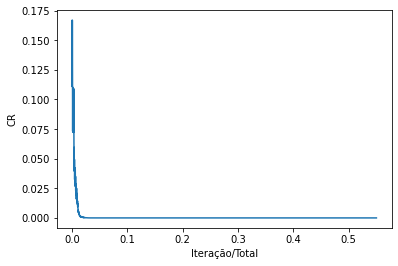

In [72]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

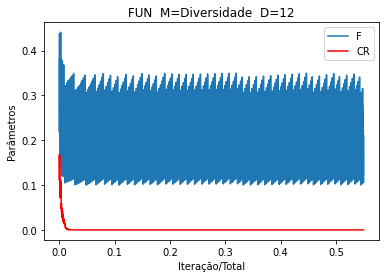

In [73]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'FUN_Diversidade_D=12')

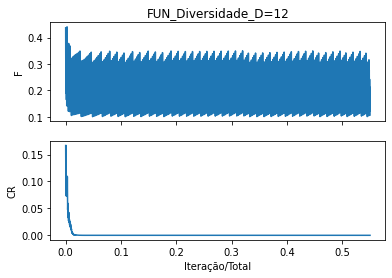

In [74]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [75]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('H-FRANNK - ','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

H-FRANNK -  TOTAL= 120000 Iterações= 2000 Dim= 12 Min/Max= 2 / 3 _ FUN
_ANN_Div3x4_Fo-0.25_CRo-0.25_D-12_Interv-2000 

MÉDIA:  16424.08657273036
MIN __: 12856.583107712513
MAX__:  22209.56621227698
STD __: 2376.9849536537217
Tempo Médio= 242.175 segundos ---
50 Rodadas

BEST:  [ 2.50780855e+00  2.31552740e+00  2.76608206e+00  2.35885252e+00
  2.27974899e-01  1.23797248e-01  6.29427346e-01  7.23695107e-01
 -4.00000000e+01 -1.99984965e+01 -5.70936640e+01 -2.68725022e+01
  1.28565831e+04]
